In [2]:
# Import Dependency
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, RFECV, f_classif, f_regression, r_regression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, BayesianRidge, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

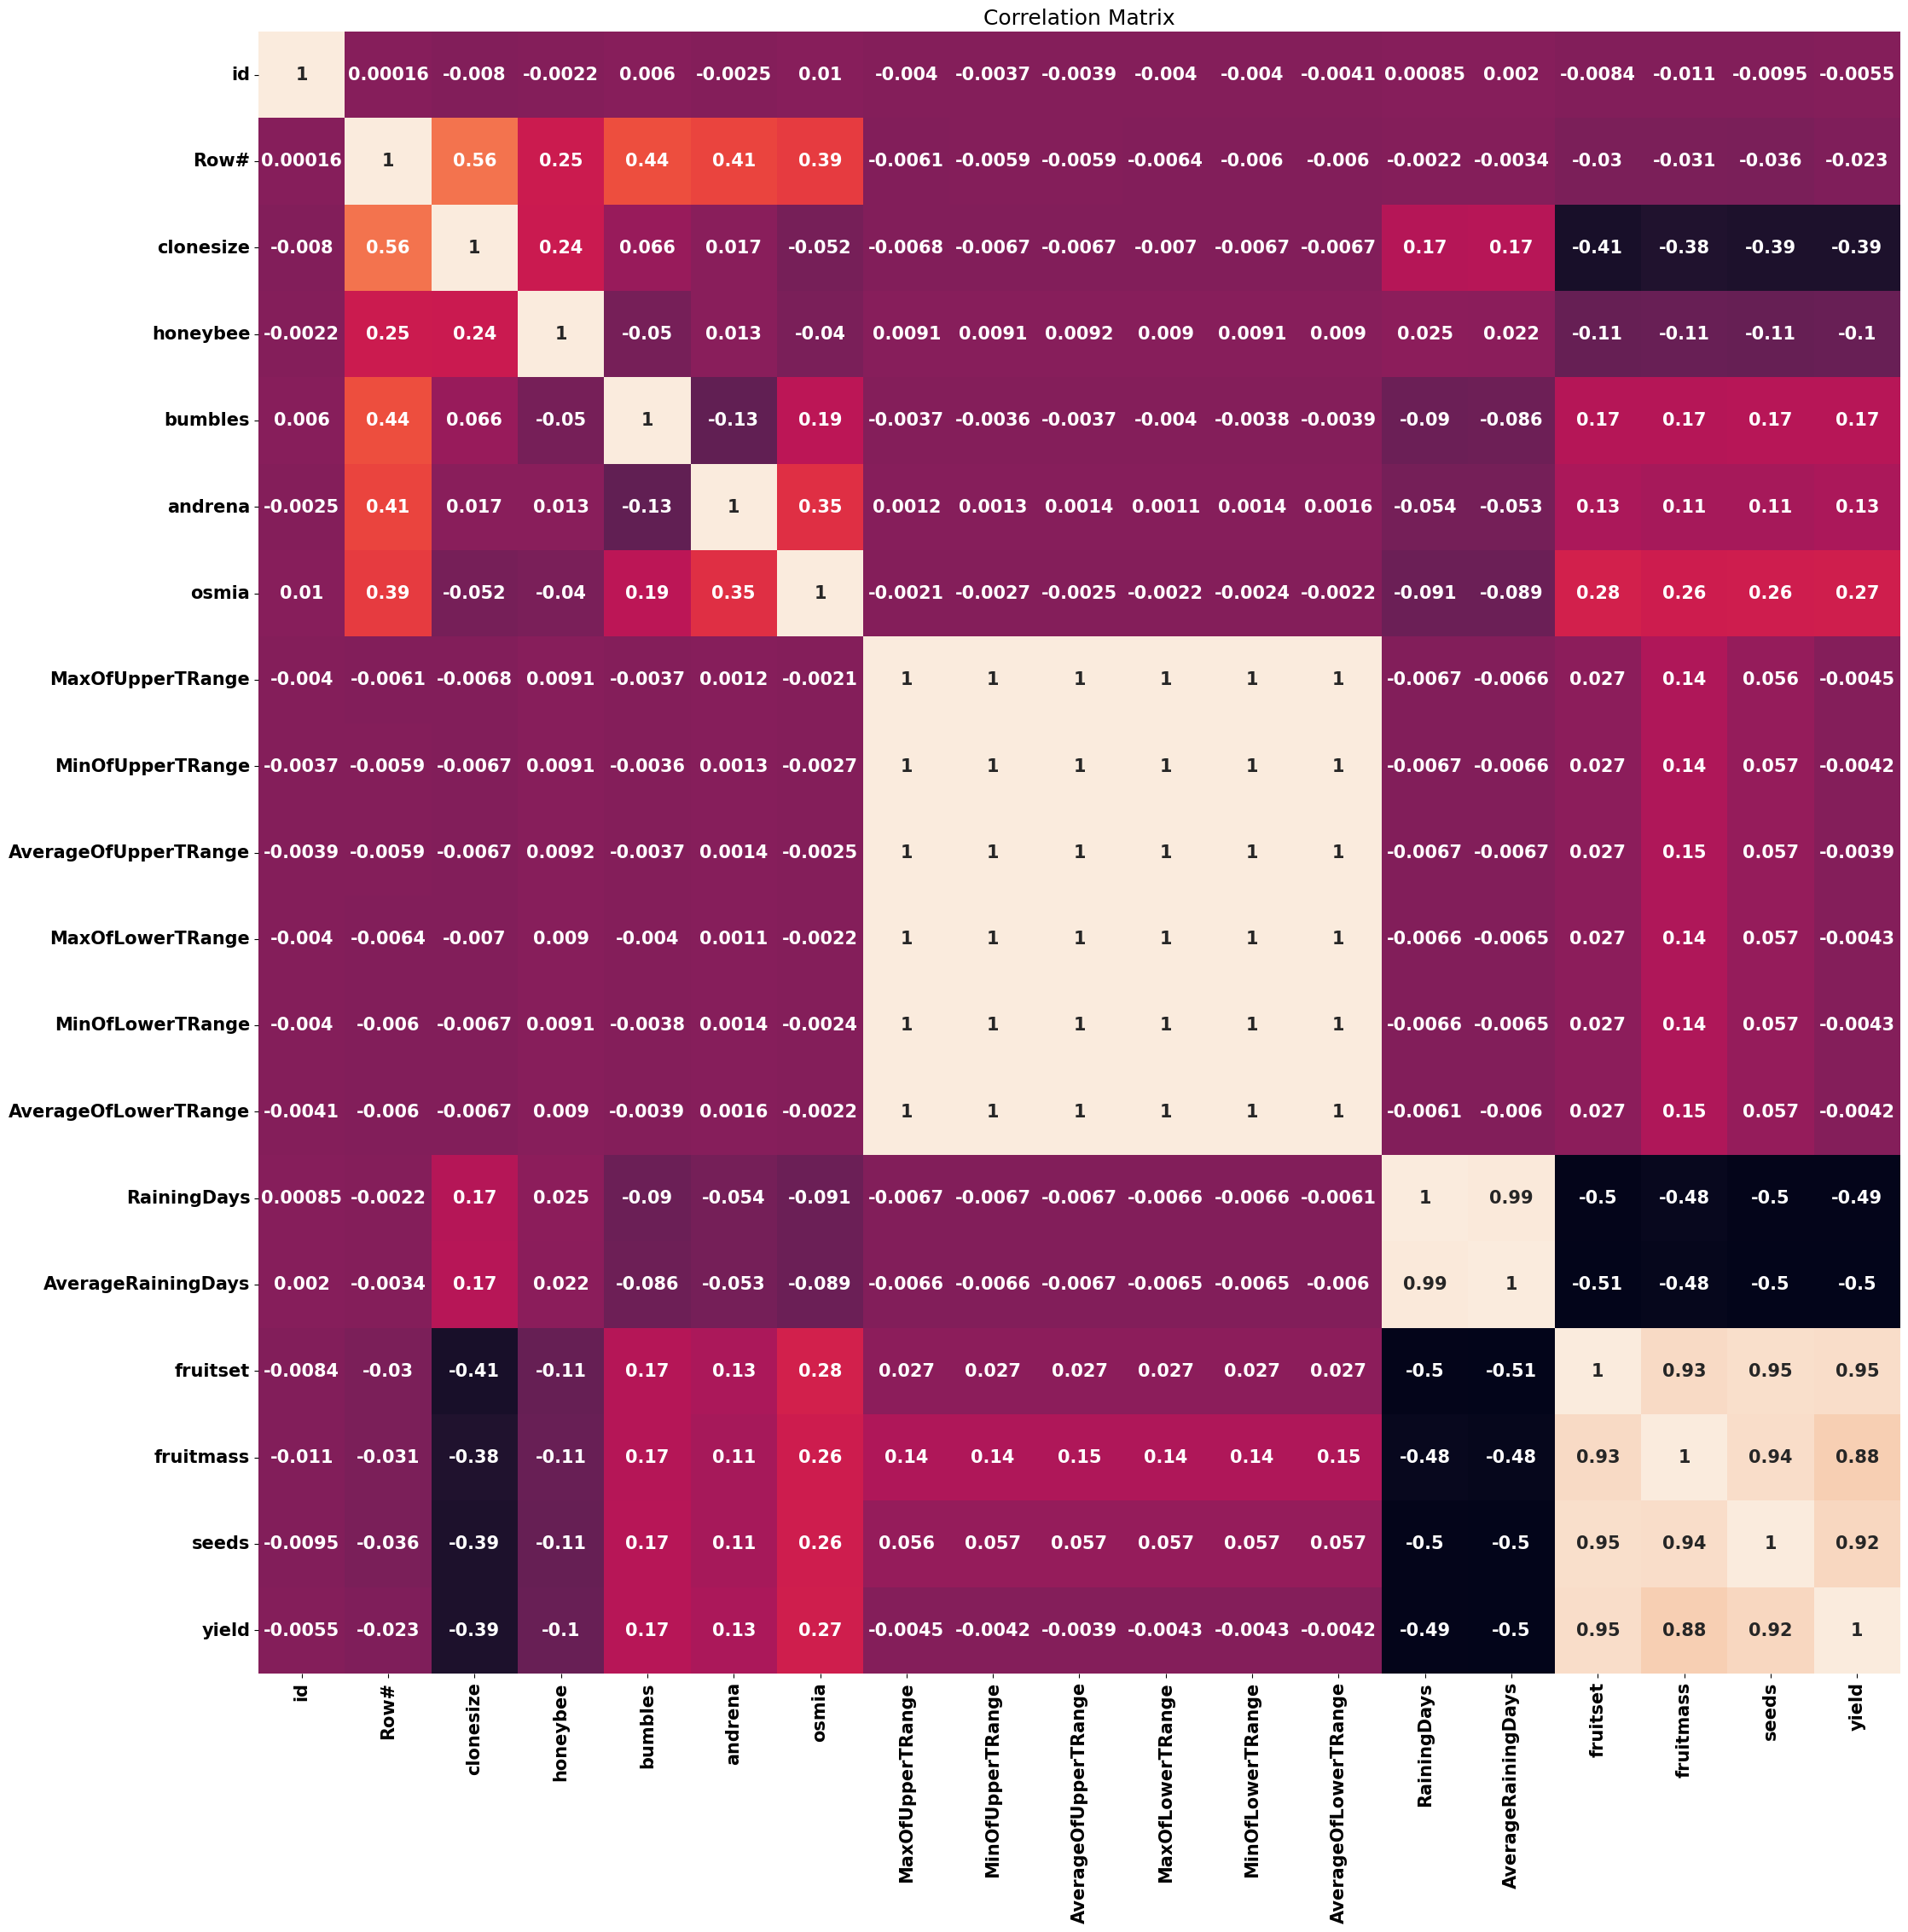

In [3]:
##   Load Datasets and Preprocessing
trainDataFile = 'train.csv'
testDataFile = 'test.csv'

##   Read CSV file
loadTrainData = pd.read_csv(trainDataFile)
loadTestData = pd.read_csv(testDataFile)

##   Correlation Of Data - Finding Correlation
corr = loadTrainData.corr(method = 'pearson')

# Highly Correlated Features - Set the threshold for high correlation
threshold = 0.8
# Create a list of highly correlated features - Select upper triangle of correlation matrix
upperTriangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
highCorrFeature = [column for column in upperTriangle.columns if any(upperTriangle[column].abs() > threshold)]

# Drop the highly correlated features from the Dataset
reducedData = loadTrainData.drop(highCorrFeature, axis=1)
# print(reducedData)

# Visualize the correlation matrix
plt.figure(figsize=(25, 25))
plt.rcParams.update({'font.size': 15, 'font.weight': 'bold'})
sns.heatmap(corr, annot=True, square=True, cbar=False)
plt.title("Correlation Matrix")
plt.show()

In [3]:
# # Assuming loadTrainData and loadTestData are dataframes
# updatedTrainData = loadTrainData.copy()
# updatedTestData = loadTestData.copy()

# # Correct the list of column names
# tRange = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']
# rDays = ['RainingDays', 'AverageRainingDays']
# fms = ['fruitset', 'fruitmass', 'seeds']

# # Calculate max and mean temperature ranges
# updatedTrainData['MaxTRange'] = updatedTrainData[tRange].max(axis=1)
# updatedTrainData['MeanTRange'] = updatedTrainData[tRange].mean(axis=1)

# # Calculate max and mean raining days
# updatedTrainData['MaxRDays'] = updatedTrainData[rDays].max(axis=1)
# updatedTrainData['MeanRDays'] = updatedTrainData[rDays].mean(axis=1)


# # updatedTrainData['maxFMS'] = updatedTrainData[fms].max(axis=1)
# # updatedTrainData['meanFMS'] = updatedTrainData[fms].mean(axis=1)

# # Calculate max and mean temperature ranges
# updatedTestData['MaxTRange'] = updatedTestData[tRange].max(axis=1)
# updatedTestData['MeanTRange'] = updatedTestData[tRange].mean(axis=1)

# # Calculate max and mean raining days
# updatedTestData['MaxRDays'] = updatedTestData[rDays].max(axis=1)
# updatedTestData['MeanRDays'] = updatedTestData[rDays].mean(axis=1)


# # updatedTestData['maxFMS'] = updatedTestData[fms].max(axis=1)
# # updatedTestData['meanFMS'] = updatedTestData[fms].mean(axis=1)

# # # Display updated dataframe
# # print(updatedTrainData.head())

In [4]:
# ##   Correlation Of Data - Finding Correlation
# corr = updatedTrainData.corr(method = 'pearson')

# # Highly Correlated Features - Set the threshold for high correlation
# threshold = 0.8
# # Create a list of highly correlated features - Select upper triangle of correlation matrix
# upperTriangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# # Find features with correlation greater than threshold
# highCorrFeature = [column for column in upperTriangle.columns if any(upperTriangle[column].abs() > threshold)]

# # Drop the highly correlated features from the Dataset
# # reducedData = updatedTrainData.drop(highCorrFeature, axis=1)
# # print(reducedData)

# # Visualize the correlation matrix
# plt.figure(figsize=(20, 20))
# plt.rcParams.update({'font.size': 10, 'font.weight': 'normal'})
# sns.heatmap(corr, annot=True, square=True, cbar=False)
# plt.title("Correlation Matrix")
# plt.show()

In [4]:
# updatedTrainData = updatedTrainData.drop(columns=tRange+rDays)
# updatedTrainData = updatedTrainData.drop(columns=['MeanTRange', 'MeanRDays', 'yield', 'id', 'Row#'])
# updatedTestData = updatedTestData.drop(columns=tRange+rDays)
# updatedTestData = updatedTestData.drop(columns=['MeanTRange', 'MeanRDays', 'id', 'Row#'])

featureToRemoveTR = ['yield', 'id', 'Row#']
featureToRemoveTE = ['id', 'Row#']

In [7]:
# updatedTrainData.head(5)
# updatedTestData.head(5)

### ***K-Fold Validation***

In [112]:
# from sklearn.feature_selection import RFE
# from xgboost import XGBRegressor
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import pandas as pd

# # Step 1: Select best features using Recursive Feature Elimination (RFE) with XGBoost
# def select_best_features_rfe(X, y, n_features_to_select=6):
#     model = XGBRegressor(n_estimators=250, learning_rate=0.05, max_depth=5, random_state=120)
#     rfe = RFE(model, n_features_to_select=n_features_to_select)
#     rfe.fit(X, y)
    
#     # Get the selected features
#     selected_features = X.columns[rfe.support_]
#     print("Selected features by RFE:")
#     print(selected_features)
#     return selected_features

# # Step 2: Train a model using selected features with KFold Cross-Validation
# def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='xgboost'):
#     X_selected = X[selected_features]
    
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X_selected)
    
#     # Select model type (XGBoost in this case)
#     if model_type == 'xgboost':
#         model = XGBRegressor(n_estimators=120, learning_rate=0.05, max_depth=4, random_state=80)
#     else:
#         raise ValueError("Unsupported model type")
    
#     # Set up K-Fold cross-validation
#     kf = KFold(n_splits=25, shuffle=True, random_state=100)
    
#     # Perform cross-validation with MAE as the evaluation metric
#     cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')

#     print(f"\nCross-validated MAE (10-Fold): {np.mean(-cv_scores):.4f}")
    
#     # Fit the model on the entire dataset
#     model.fit(X_scaled, y)
    
#     # Predict on testData (optional)
#     if testData is not None:
#         X_test_scaled = scaler.transform(testData[selected_features])
#         testPredictions = model.predict(X_test_scaled)
        
#         output = pd.DataFrame({
#             'id': idTest,
#             'yield': testPredictions
#         })
        
#         output_file = 'YieldPredictition_1.csv'
#         output.to_csv(output_file, index=False)
#         print(f"Predictions saved to {output_file}")

# # Example usage
# # Assuming trainData and testData are preloaded pandas DataFrames
# X = loadTrainData.drop(columns=featureToRemoveTR)  # All features initially
# y = loadTrainData['yield']

# # Step 1: Select best features using RFE
# selected_features = select_best_features_rfe(X, y)

# # Step 2: Train a model with K-Fold cross-validation using those selected features
# train_model_with_selected_features_cv(X, y, selected_features, testData=loadTestData.drop(columns=featureToRemoveTE), idTest=loadTestData['id'])


Selected features by RFE:
Index(['MaxOfUpperTRange', 'MinOfUpperTRange', 'RainingDays', 'fruitset',
       'fruitmass', 'seeds'],
      dtype='object')

Cross-validated MAE (10-Fold): 289.3253
Predictions saved to YieldPrediction_Ensemble.csv


In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd

# Step 1: Select best features using Recursive Feature Elimination (RFE) with XGBoost
def select_best_features_rfe(X, y, n_features_to_select=12):
    model = XGBRegressor(n_estimators=250, learning_rate=.1, max_depth=5, random_state=42)
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    
    # Get the selected features
    selected_features = X.columns[rfe.support_]
    print("Selected features by RFE:")
    print(selected_features)
    return selected_features

# Step 2: Train a model using selected features with KFold Cross-Validation
def train_model_with_ensemble_cv(X, y, selected_features, testData=None, idTest=None):
    X_selected = X[selected_features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)
    
    # Create a Voting Regressor with different models
    model1 = XGBRegressor(n_estimators=120, learning_rate=.1, max_depth=4, random_state=42)
    model5 = GradientBoostingRegressor(n_estimators=120, learning_rate=.1, max_depth=4, random_state=42)
    model2 = LinearRegression()
    model3 = RandomForestRegressor(n_estimators=100, random_state=42)
    model4 = SVR()

    ensemble_model = VotingRegressor(estimators=[
        ('xgb', model1),
        ('gb', model5),
        ('lr', model2),
        ('rf', model3),
        ('svr', model4)
    ])
    
    # Set up K-Fold cross-validation
    kf = KFold(n_splits=20, shuffle=True, random_state=75)
    
    # Perform cross-validation with MAE as the evaluation metric
    cv_scores = cross_val_score(ensemble_model, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
    
    print(f"\nCross-validated MAE (10-Fold): {np.mean(-cv_scores):.4f}")
    
    # Fit the ensemble model on the entire dataset
    ensemble_model.fit(X_scaled, y)
    
    # Predict on testData (optional)
    if testData is not None:
        X_test_scaled = scaler.transform(testData[selected_features])
        testPredictions = ensemble_model.predict(X_test_scaled)
        
        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })
        
        output_file = 'YieldPrediction_1.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
# Assuming loadTrainData and loadTestData are preloaded pandas DataFrames
X = loadTrainData.drop(columns=featureToRemoveTR)  # All features initially
y = loadTrainData['yield']

# Step 1: Select best features using RFE
selected_features = select_best_features_rfe(X, y)

# Step 2: Train an ensemble model with K-Fold cross-validation using those selected features
train_model_with_ensemble_cv(X, y, selected_features, testData=loadTestData.drop(columns=featureToRemoveTE), idTest=loadTestData['id'])


Selected features by RFE:
Index(['clonesize', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange',
       'MinOfUpperTRange', 'AverageOfUpperTRange', 'RainingDays',
       'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

Cross-validated MAE (10-Fold): 286.6310
Predictions saved to YieldPrediction_1.csv


In [ ]:
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.svm import SVR
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import os

# # Load training and test data
# train_data = pd.read_csv('train.csv')  # Update path to your training data
# test_data = pd.read_csv('test.csv')    # Update path to your test data

# # Features and target variable
# features = train_data.drop(columns=['id', 'Row#', 'yield'])
# target = train_data['yield']
# test_features = test_data.drop(columns=['id', 'Row#'])  # Assuming the test dataset doesn't have 'yield'

# # Define regression models
# models = {
#     'LinearRegression': LinearRegression(),
#     'Ridge': Ridge(),
#     'Lasso': Lasso(),
#     'ElasticNet': ElasticNet(),
#     'RandomForest': RandomForestRegressor(),
#     'GradientBoosting': GradientBoostingRegressor(),
#     'XGBoost': XGBRegressor(),
#     'LightGBM': LGBMRegressor(),
#     'SVR': SVR()
# }

# # Define feature selection/extraction methods
# feature_methods = {
#     'SelectKBest': SelectKBest(score_func=f_regression, k=5),  # Select top k features
#     'PCA': PCA(n_components=5),  # Adjust number of components as needed
#     'RFE': RFE(estimator=RandomForestRegressor(), n_features_to_select=5),  # Select top features
#     'VarianceThreshold': VarianceThreshold(threshold=0.01),  # Remove low-variance features
# }

# # Create output directory if not exists
# output_dir = 'model_outputs'
# os.makedirs(output_dir, exist_ok=True)

# # Training and prediction
# for model_name, model in models.items():
#     for method_name, method in feature_methods.items():
#         # Perform K-Fold cross-validation
#         kf = KFold(n_splits=5, shuffle=True, random_state=42)
#         predictions = np.zeros(len(features))  # Create array to store predictions for entire dataset

#         for train_index, val_index in kf.split(features):
#             X_train, X_val = features.iloc[train_index], features.iloc[val_index]
#             y_train, y_val = target.iloc[train_index], target.iloc[val_index]

#             # Feature selection/extraction
#             if method_name == 'PCA':
#                 X_train_transformed = method.fit_transform(X_train)
#                 X_val_transformed = method.transform(X_val)
#                 X_test_transformed = method.transform(test_features)  # Transform test data
#             else:  # For SelectKBest, RFE, and VarianceThreshold
#                 X_train_transformed = method.fit_transform(X_train, y_train)
#                 X_val_transformed = method.transform(X_val)
#                 X_test_transformed = method.transform(test_features)  # Transform test data

#             # Train the model
#             model.fit(X_train_transformed, y_train)
#             # Validate the model
#             preds = model.predict(X_val_transformed)
#             predictions[val_index] = preds  # Store predictions in correct positions

#         # Save the training predictions to CSV
#         output_df = pd.DataFrame({'id': train_data['id'], 'PredictedYield': predictions})
#         output_df.to_csv(f'{output_dir}/{model_name}_{method_name}_train_predictions.csv', index=False)

#         # Now, generate predictions on the test data and save it
#         test_predictions = model.predict(X_test_transformed)  # Predict on test data
#         test_output_df = pd.DataFrame({'id': test_data['id'], 'PredictedYield': test_predictions})
#         test_output_df.to_csv(f'{output_dir}/{model_name}_{method_name}_test_predictions.csv', index=False)

# print("Training, validation, and test predictions completed!")


f:\MTech_IIITD\pyEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.611e+07, tolerance: 2.179e+06
  model = cd_fast.enet_coordinate_descent(


In [10]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.feature_selection import SelectKBest, f_regression, RFE
# from sklearn.decomposition import PCA
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import xgboost as xgb
# import lightgbm as lgb
# from sklearn.ensemble import VotingRegressor, StackingRegressor

# # Load the training and test data
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

# # Separate features and target for training data
# X = train_df.drop(['id', 'Row#', 'yield'], axis=1)
# y = train_df['yield']

# # Prepare test data
# X_test_final = test_df.drop(['id', 'Row#'], axis=1)

# # Split training data for validation
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_final_scaled = scaler.transform(X_test_final)

# # Feature Selection Methods
# def get_selected_features(X_train, y_train, X_val, X_test_final):
#     # 1. SelectKBest
#     k_best = SelectKBest(score_func=f_regression, k=10)
#     X_train_kbest = k_best.fit_transform(X_train, y_train)
#     X_val_kbest = k_best.transform(X_val)
#     X_test_kbest = k_best.transform(X_test_final)
    
#     # 2. RFE with RandomForest
#     rfe = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=10)
#     X_train_rfe = rfe.fit_transform(X_train, y_train)
#     X_val_rfe = rfe.transform(X_val)
#     X_test_rfe = rfe.transform(X_test_final)
    
#     # 3. PCA
#     pca = PCA(n_components=10)
#     X_train_pca = pca.fit_transform(X_train)
#     X_val_pca = pca.transform(X_val)
#     X_test_pca = pca.transform(X_test_final)
    
#     return (X_train_kbest, X_val_kbest, X_test_kbest), \
#            (X_train_rfe, X_val_rfe, X_test_rfe), \
#            (X_train_pca, X_val_pca, X_test_pca)

# # Get selected features
# (X_train_kbest, X_val_kbest, X_test_final_kbest), \
# (X_train_rfe, X_val_rfe, X_test_final_rfe), \
# (X_train_pca, X_val_pca, X_test_final_pca) = \
#     get_selected_features(X_train_scaled, y_train, X_val_scaled, X_test_final_scaled)

# # Base Models
# def get_base_models():
#     models = {
#         'lr': LinearRegression(),
#         'ridge': Ridge(alpha=1.0),
#         'lasso': Lasso(alpha=1.0),
#         'elastic': ElasticNet(alpha=1.0, l1_ratio=0.5),
#         'rf': RandomForestRegressor(n_estimators=100, random_state=42),
#         'gb': GradientBoostingRegressor(n_estimators=100, random_state=42),
#         'xgb': xgb.XGBRegressor(random_state=42),
#         'lgb': lgb.LGBMRegressor(random_state=42),
#         'svr': SVR(kernel='rbf')
#     }
#     return models

# # Ensemble Methods
# def create_ensemble_models(base_models):
#     # Voting Regressor
#     voting_reg = VotingRegressor(
#         estimators=[(name, model) for name, model in base_models.items()]
#     )
    
#     # Stacking Regressor
#     stacking_reg = StackingRegressor(
#         estimators=[(name, model) for name, model in base_models.items()],
#         final_estimator=RandomForestRegressor(n_estimators=100, random_state=42)
#     )
    
#     return {'voting': voting_reg, 'stacking': stacking_reg}

# # Train and Evaluate Models
# def train_and_evaluate(X_train, X_val, y_train, y_val, base_models, ensemble_models):
#     for name, model in base_models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_val)
#         mse = mean_squared_error(y_val, y_pred)
#         mae = mean_absolute_error(y_val, y_pred)
#         r2 = r2_score(y_val, y_pred)
#         print(f'Model: {name}, MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')
    
#     for name, model in ensemble_models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_val)
#         mse = mean_squared_error(y_val, y_pred)
#         mae = mean_absolute_error(y_val, y_pred)
#         r2 = r2_score(y_val, y_pred)
#         print(f'Model: {name}, MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

# # Train and Evaluate Models with Feature Selection
# base_models = get_base_models()
# ensemble_models = create_ensemble_models(base_models)

# print('Without Feature Selection:')
# train_and_evaluate(X_train_scaled, X_val_scaled, y_train, y_val, base_models, ensemble_models)

# print('\nWith SelectKBest:')
# train_and_evaluate(X_train_kbest, X_val_kbest, y_train, y_val, base_models, ensemble_models)

# print('\nWith RFE:')
# train_and_evaluate(X_train_rfe, X_val_rfe, y_train, y_val, base_models, ensemble_models)

# print('\nWith PCA:')
# train_and_evaluate(X_train_pca, X_val_pca, y_train, y_val, base_models, ensemble_models)

# # Make predictions on test data
# def make_predictions(X_test, X_test_kbest, X_test_rfe, X_test_pca, base_models, ensemble_models):
#     predictions = {}
    
#     # Predict using the original feature set (without feature selection)
#     for name, model in base_models.items():
#         try:
#             predictions[name + '_original'] = model.predict(X_test)
#         except ValueError as e:
#             print(f"Model {name} encountered an error with original features: {e}")
    
#     # Predict using SelectKBest features
#     for name, model in base_models.items():
#         try:
#             predictions[name + '_kbest'] = model.predict(X_test_kbest)
#         except ValueError as e:
#             print(f"Model {name} encountered an error with SelectKBest features: {e}")
    
#     # Predict using RFE features
#     for name, model in base_models.items():
#         try:
#             predictions[name + '_rfe'] = model.predict(X_test_rfe)
#         except ValueError as e:
#             print(f"Model {name} encountered an error with RFE features: {e}")
    
#     # Predict using PCA features
#     for name, model in base_models.items():
#         try:
#             predictions[name + '_pca'] = model.predict(X_test_pca)
#         except ValueError as e:
#             print(f"Model {name} encountered an error with PCA features: {e}")
    
#     # Ensemble models
#     for name, model in ensemble_models.items():
#         try:
#             predictions[name + '_original'] = model.predict(X_test)
#         except ValueError as e:
#             print(f"Ensemble model {name} encountered an error with original features: {e}")
    
#     for name, model in ensemble_models.items():
#         try:
#             predictions[name + '_kbest'] = model.predict(X_test_kbest)
#         except ValueError as e:
#             print(f"Ensemble model {name} encountered an error with SelectKBest features: {e}")
    
#     for name, model in ensemble_models.items():
#         try:
#             predictions[name + '_rfe'] = model.predict(X_test_rfe)
#         except ValueError as e:
#             print(f"Ensemble model {name} encountered an error with RFE features: {e}")
    
#     for name, model in ensemble_models.items():
#         try:
#             predictions[name + '_pca'] = model.predict(X_test_pca)
#         except ValueError as e:
#             print(f"Ensemble model {name} encountered an error with PCA features: {e}")
    
#     return predictions

# # Make predictions on test data with feature selection
# predictions = {}
# predictions.update(make_predictions(
#     X_test_final_scaled, X_test_final_kbest, X_test_final_rfe, X_test_final_pca,
#     base_models, ensemble_models
# ))

# # Create output.csv
# output_df = pd.DataFrame(predictions)
# output_df['id'] = test_df['id']
# output_df.to_csv('output.csv', index=False)


Without Feature Selection:
Model: lr, MSE: 195998.01, MAE: 280.13, R2: 0.89
Model: ridge, MSE: 196016.33, MAE: 280.13, R2: 0.89
Model: lasso, MSE: 196127.91, MAE: 280.00, R2: 0.89
Model: elastic, MSE: 266869.95, MAE: 357.52, R2: 0.85
Model: rf, MSE: 177260.09, MAE: 265.03, R2: 0.90
Model: gb, MSE: 167441.51, MAE: 252.41, R2: 0.91
Model: xgb, MSE: 174235.31, MAE: 266.35, R2: 0.90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 16
[LightGBM] [Info] Start training from score 6006.948416
Model: lgb, MSE: 170039.75, MAE: 254.54, R2: 0.91
Model: svr, MSE: 799681.64, MAE: 665.46, R2: 0.56
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001683 seconds.
You ca